In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import numpy as np

%matplotlib inline

### Calculate Metascores with ten as a full score

In [2]:
imdb_T = pd.read_csv('imdb_T.csv')
imdb_T

Metascore                   director             dlink imdb_rate_num  \
0         83.0                David Lynch  /name/nm0000186/       291,785   
1         85.0               Kar-Wai Wong  /name/nm0939182/       106,308   
2         85.0            Terrence Malick  /name/nm0000517/       156,582   
3         75.0            Jean-Luc Godard  /name/nm0000419/         4,918   
4          NaN          Mohammad Rasoulof  /name/nm1488024/           458   
5         76.0                 Raoul Ruiz  /name/nm0749914/           409   
6         82.0           Abbas Kiarostami  /name/nm0452102/        18,296   
7          NaN                 Johnnie To  /name/nm0864775/         2,556   
8          NaN                        NaN               NaN           NaN   
9         89.0              Michel Gondry  /name/nm0327273/       828,533   
10        71.0  Apichatpong Weerasethakul  /name/nm0917405/         3,377   
11        96.0             Hayao Miyazaki  /name/nm0594503/       561,576   
12         NaN                        NaN               NaN           NaN   
13        88.0               Wes Anderson  /name/nm0027572/       636,092   
14        69.0            Terrence Malick  /name/nm0000517/        78,753   
15        81.0                Zhangke Jia  /name/nm0422605/         2,742   
16        70.0               Gus Van Sant  /name/nm0001814/        80,713   
17        95.0            Kathryn Bigelow  /name/nm0000941/       251,832   
18        81.0           David Cronenberg  /name/nm0000343/       211,236   
19        80.0            Martin Campbell  /name/nm0132709/       540,713   
20        78.0               Miguel Gomes  /name/nm0326937/         6,030   
21        82.0               Pablo Berger  /name/nm0074311/         9,767   
22        82.0              Courtney Hunt  /name/nm2581581/        23,588   
23        90.0              Robert Altman  /name/nm0000265/        73,906   
24        74.0          Christopher Nolan  /name/nm0634240/     1,848,653   
25        98.0         Guillermo del Toro  /name/nm0868219/       574,029   
26        83.0             Michael Haneke  /name/nm0359734/        66,500   
27        87.0              Werner Herzog  /name/nm0001348/        48,431   
28        84.0                 Leos Carax  /name/nm0136021/        37,006   
29        80.0            Claude Lanzmann  /name/nm0487351/           579   
..         ...                        ...               ...           ...   
510       75.0           Warwick Thornton  /name/nm0861610/         3,037   
511        NaN       Jean-Claude Brisseau  /name/nm0109885/         4,283   
512       75.0            Lucrecia Martel  /name/nm0551506/         4,696   
513       82.0               Patrick Wang  /name/nm1169526/           650   
514        NaN               Gus Van Sant  /name/nm0001814/        16,810   
515       76.0              Roy Andersson  /name/nm0027815/        15,769   
516        NaN            Ming-liang Tsai  /name/nm0158857/           658   
517       67.0            Pirjo Honkasalo  /name/nm0393345/           601   
518       76.0            Carlos Reygadas  /name/nm1196161/         2,943   
519       77.0      Kleber Mendonça Filho  /name/nm2207625/         5,694   
520       88.0             Laurent Cantet  /name/nm0134559/         4,481   
521       83.0          Tatiana Pauhofová  /name/nm1294207/         1,188   
522       86.0          Christian Petzold  /name/nm0678857/        11,338   
523       65.0               Jee-woon Kim  /name/nm0453518/        50,914   
524       85.0            Kelly Reichardt  /name/nm0716980/        10,475   
525        NaN             Richard Curtis  /name/nm0193485/       386,892   
526       82.0               Rob Marshall  /name/nm0551128/       201,603   
527       79.0             Stephen Frears  /name/nm0001241/       158,765   
528       68.0         Christopher Morris  /name/nm0606439/        66,366   
529       89.0             Anurag Kashyap  /name/nm0440604/        69,406   
5

In [3]:
imdb_T['Metascore'] = imdb_T['Metascore'].map(lambda x: x/10)
imdb_T.head()

Metascore           director             dlink imdb_rate_num  imdb_rating  \
0        8.3        David Lynch  /name/nm0000186/       291,785          8.0   
1        8.5       Kar-Wai Wong  /name/nm0939182/       106,308          8.1   
2        8.5    Terrence Malick  /name/nm0000517/       156,582          6.8   
3        7.5    Jean-Luc Godard  /name/nm0000419/         4,918          5.9   
4        NaN  Mohammad Rasoulof  /name/nm1488024/           458          7.6   

              movie_name                   mv_fullname    titleId  
0        Mulholland Dr.         Mulholland Dr. (2001)   tt0166924  
1  In the Mood for Love   In the Mood for Love (2000)   tt0118694  
2      The Tree of Life       The Tree of Life (2011)   tt0478304  
3      Adieu au langage       Adieu au langage (2014)   tt2400275  
4   Keshtzar haye sepid    Keshtzar haye sepid (2009)   tt1509132

### Merge the movie_info table and the table with ratings

In [313]:
imdb_t = pd.read_csv('imdb_t_fixed.csv',index_col = 0)
imdb_t.head()

movie_name     movie_director  movie_year  num_of_nom    titleId
0      Mulholland Drive        David Lynch        2001          47  tt0166924
1  In the Mood for Love       Wong Kar-wai        2000          49  tt0118694
2      The Tree of Life    Terrence Malick        2011          23  tt0478304
3   Goodbye to Language    Jean-Luc Godard        2014           6  tt2400275
4     The White Meadows  Mohammad Rasoulof        2009           1  tt1509132

In [11]:
imdbM = pd.merge(imdb_T, imdb_t, on = 'titleId').drop(columns = ['movie_name_x','imdb_rate_num'])
imdbM = imdbM[['titleId','mv_fullname','movie_name_y','movie_year','num_of_nom',
      'movie_director','director','dlink',
      'imdb_rating','Metascore']]
imdbM

titleId                                    mv_fullname  \
0    tt0166924                         Mulholland Dr. (2001)    
1    tt0118694                   In the Mood for Love (2000)    
2    tt0478304                       The Tree of Life (2011)    
3    tt2400275                       Adieu au langage (2014)    
4    tt1509132                    Keshtzar haye sepid (2009)    
5    tt1876360                   La Noche de Enfrente (2012)    
6    tt1020773                         Certified Copy (2010)    
7    tt0491044                               Man jeuk (2008)    
8    tt0338013  Eternal Sunshine of the Spotless Mind (2004)    
9    tt0477731                          Sang sattawat (2006)    
10   tt0245429                          Spirited Away (2001)    
11   tt2278388               The Grand Budapest Hotel (2014)    
12   tt0402399                          The New World (2005)    
13   tt0423176                                 Shijie (2004)    
14   tt0363589                               Elephant (2003)    
15   tt1790885                       Zero Dark Thirty (2012)    
16   tt0399146                  A History of Violence (2005)    
17   tt0381061                          Casino Royale (2006)    
18   tt2153963                                   Tabu (2012)    
19   tt1854513                           Blancanieves (2012)    
20   tt0978759                           Frozen River (2008)    
21   tt0280707                           Gosford Park (2001)    
22   tt1375666                              Inception (2010)    
23   tt0457430                        Pan's Labyrinth (2006)    
24   tt0387898                                  Caché (2005)    
25   tt0427312                            Grizzly Man (2005)    
26   tt2076220                            Holy Motors (2012)    
27   tt2340784                Le dernier des injustes (2013)    
28   tt0469494                    There Will Be Blood (2007)    
29   tt0254686                      The Piano Teacher (2001)    
..         ...                                            ...   
505  tt1340123                     Samson and Delilah (2009)    
506  tt0287963                        Choses secrètes (2002)    
507  tt0240419                             La Ciénaga (2001)    
508  tt1845804                          In the Family (2011)    
509  tt0302674                                  Gerry (2002)    
510  tt0120263            Songs from the Second Floor (2000)    
511  tt3521442                                 Xi you (2014)    
512  tt0424272                Melancholian 3 huonetta (2004)    
513  tt0322824                                  Japón (2002)    
514  tt2190367                     Neighboring Sounds (2012)    
515  tt0279065                               Time Out (2001)    
516  tt2280344                        Horící ker                
517  tt2178941                                Barbara (2012)    
518  tt0365376                  A Tale of Two Sisters (2003)    
519  tt1518812                          Meek's Cutoff (2010)    
520  tt0314331                          Love Actually (2003)    
521  tt0299658                                Chicago (2002)    
522  tt0146882                          High Fidelity (2000)    
523  tt1341167                             Four Lions (2010)    
524  tt1954470                     Gangs of Wasseypur (2012)    
525  tt0480025                        This Is England (2006)    
526  tt1189073                     La piel que habito (2011)    
527  tt0907657                                   Once (2007)    
528  tt0317171                            Sud sanaeha (2002)    
529  tt0799934                         Be Kind Rewind (2008)    
530  tt1073535                   Frontier of the Dawn (2008)    
531  tt0855824                           Hei yan quan (2006)    
532  tt0344273                          Kings & Queen (2004)    
533  tt0274558                              The Hours (2002)    
534  tt0769507           Tai yang zhao cha

### Get the directors' info from their movies' links

In [74]:
def scrape_page(row):

    url = f"https://www.imdb.com{row['dlink']}"
    print("Scraping", url)

    response = requests.get(url)
    doc = BeautifulSoup(response.text)
    print('Now Scraping', url)

    Directors = {}
    Directors['titleId'] = row['titleId']

    try:
        Directors['movie_director'] = doc.find(class_="itemprop").text
    except:
        pass

    try:
        birth = doc.find(id ="name-born-info")
    except:
        pass

    try:
        death = doc.find(id="name-death-info")
    except:
        pass

    try:
        Directors['birthDate'] = birth.find('time')['datetime']
    except:
        pass

    try:
        Directors['deathDate'] = death.find_all('time')[-1]['datetime']
    except:
        pass

    try:
        Directors['birthPlace'] = birth.find_all('a')[-1].text
    except:
        pass
    
    return pd.Series(Directors)


In [75]:
imdb_n = imdbM.apply(scrape_page,axis = 1)

Scraping https://www.imdb.com/name/nm0000186/
Now Scraping https://www.imdb.com/name/nm0000186/
Scraping https://www.imdb.com/name/nm0000186/
Now Scraping https://www.imdb.com/name/nm0000186/
Scraping https://www.imdb.com/name/nm0939182/
Now Scraping https://www.imdb.com/name/nm0939182/
Scraping https://www.imdb.com/name/nm0000517/
Now Scraping https://www.imdb.com/name/nm0000517/
Scraping https://www.imdb.com/name/nm0000419/
Now Scraping https://www.imdb.com/name/nm0000419/
Scraping https://www.imdb.com/name/nm1488024/
Now Scraping https://www.imdb.com/name/nm1488024/
Scraping https://www.imdb.com/name/nm0749914/
Now Scraping https://www.imdb.com/name/nm0749914/
Scraping https://www.imdb.com/name/nm0452102/
Now Scraping https://www.imdb.com/name/nm0452102/
Scraping https://www.imdb.com/name/nm0864775/
Now Scraping https://www.imdb.com/name/nm0864775/
Scraping https://www.imdb.com/name/nm0327273/
Now Scraping https://www.imdb.com/name/nm0327273/
Scraping https://www.imdb.com/name/nm091

Now Scraping https://www.imdb.com/name/nm0551506/
Scraping https://www.imdb.com/name/nm0027572/
Now Scraping https://www.imdb.com/name/nm0027572/
Scraping https://www.imdb.com/name/nm0027572/
Now Scraping https://www.imdb.com/name/nm0027572/
Scraping https://www.imdb.com/name/nm0001068/
Now Scraping https://www.imdb.com/name/nm0001068/
Scraping https://www.imdb.com/name/nm1053530/
Now Scraping https://www.imdb.com/name/nm1053530/
Scraping https://www.imdb.com/name/nm0881279/
Now Scraping https://www.imdb.com/name/nm0881279/
Scraping https://www.imdb.com/name/nm0345174/
Now Scraping https://www.imdb.com/name/nm0345174/
Scraping https://www.imdb.com/name/nm0446819/
Now Scraping https://www.imdb.com/name/nm0446819/
Scraping https://www.imdb.com/name/nm0000759/
Now Scraping https://www.imdb.com/name/nm0000759/
Scraping https://www.imdb.com/name/nm0000419/
Now Scraping https://www.imdb.com/name/nm0000419/
Scraping https://www.imdb.com/name/nm1698571/
Now Scraping https://www.imdb.com/name/n

Now Scraping https://www.imdb.com/name/nm0012529/
Scraping https://www.imdb.com/name/nm0001081/
Now Scraping https://www.imdb.com/name/nm0001081/
Scraping https://www.imdb.com/name/nm0094435/
Now Scraping https://www.imdb.com/name/nm0094435/
Scraping https://www.imdb.com/name/nm0917405/
Now Scraping https://www.imdb.com/name/nm0917405/
Scraping https://www.imdb.com/name/nm0314516/
Now Scraping https://www.imdb.com/name/nm0314516/
Scraping https://www.imdb.com/name/nm0153078/
Now Scraping https://www.imdb.com/name/nm0153078/
Scraping https://www.imdb.com/name/nm0019247/
Now Scraping https://www.imdb.com/name/nm0019247/
Scraping https://www.imdb.com/name/nm3303482/
Now Scraping https://www.imdb.com/name/nm3303482/
Scraping https://www.imdb.com/name/nm0307497/
Now Scraping https://www.imdb.com/name/nm0307497/
Scraping https://www.imdb.com/name/nm0923736/
Now Scraping https://www.imdb.com/name/nm0923736/
Scraping https://www.imdb.com/name/nm1765382/
Now Scraping https://www.imdb.com/name/n

Now Scraping https://www.imdb.com/name/nm2257147/
Scraping https://www.imdb.com/name/nm0570912/
Now Scraping https://www.imdb.com/name/nm0570912/
Scraping https://www.imdb.com/name/nm0647438/
Now Scraping https://www.imdb.com/name/nm0647438/
Scraping https://www.imdb.com/name/nm0339030/
Now Scraping https://www.imdb.com/name/nm0339030/
Scraping https://www.imdb.com/name/nm0082450/
Now Scraping https://www.imdb.com/name/nm0082450/
Scraping https://www.imdb.com/name/nm1484791/
Now Scraping https://www.imdb.com/name/nm1484791/
Scraping https://www.imdb.com/name/nm0000759/
Now Scraping https://www.imdb.com/name/nm0000759/
Scraping https://www.imdb.com/name/nm0708903/
Now Scraping https://www.imdb.com/name/nm0708903/
Scraping https://www.imdb.com/name/nm0037708/
Now Scraping https://www.imdb.com/name/nm0037708/
Scraping https://www.imdb.com/name/nm0000631/
Now Scraping https://www.imdb.com/name/nm0000631/
Scraping https://www.imdb.com/name/nm0193231/
Now Scraping https://www.imdb.com/name/n

Now Scraping https://www.imdb.com/name/nm1701024/
Scraping https://www.imdb.com/name/nm2738713/
Now Scraping https://www.imdb.com/name/nm2738713/
Scraping https://www.imdb.com/name/nm0000466/
Now Scraping https://www.imdb.com/name/nm0000466/
Scraping https://www.imdb.com/name/nm0000116/
Now Scraping https://www.imdb.com/name/nm0000116/
Scraping https://www.imdb.com/name/nm0955443/
Now Scraping https://www.imdb.com/name/nm0955443/
Scraping https://www.imdb.com/name/nm0004716/
Now Scraping https://www.imdb.com/name/nm0004716/
Scraping https://www.imdb.com/name/nm7703103/
Now Scraping https://www.imdb.com/name/nm7703103/
Scraping https://www.imdb.com/name/nm4357206/
Now Scraping https://www.imdb.com/name/nm4357206/
Scraping https://www.imdb.com/name/nm0959062/
Now Scraping https://www.imdb.com/name/nm0959062/
Scraping https://www.imdb.com/name/nm0716980/
Now Scraping https://www.imdb.com/name/nm0716980/
Scraping https://www.imdb.com/name/nm0011752/
Now Scraping https://www.imdb.com/name/n

Now Scraping https://www.imdb.com/name/nm0001348/
Scraping https://www.imdb.com/name/nm0801885/
Now Scraping https://www.imdb.com/name/nm0801885/
Scraping https://www.imdb.com/name/nm0487166/
Now Scraping https://www.imdb.com/name/nm0487166/
Scraping https://www.imdb.com/name/nm0001302/
Now Scraping https://www.imdb.com/name/nm0001302/
Scraping https://www.imdb.com/name/nm1410815/
Now Scraping https://www.imdb.com/name/nm1410815/
Scraping https://www.imdb.com/name/nm0065615/
Now Scraping https://www.imdb.com/name/nm0065615/
Scraping https://www.imdb.com/name/nm0248942/
Now Scraping https://www.imdb.com/name/nm0248942/
Scraping https://www.imdb.com/name/nm0000233/
Now Scraping https://www.imdb.com/name/nm0000233/
Scraping https://www.imdb.com/name/nm0001024/
Now Scraping https://www.imdb.com/name/nm0001024/
Scraping https://www.imdb.com/name/nm0718646/
Now Scraping https://www.imdb.com/name/nm0718646/
Scraping https://www.imdb.com/name/nm0001774/
Now Scraping https://www.imdb.com/name/n

Now Scraping https://www.imdb.com/name/nm2207625/
Scraping https://www.imdb.com/name/nm0134559/
Now Scraping https://www.imdb.com/name/nm0134559/
Scraping https://www.imdb.com/name/nm1294207/
Now Scraping https://www.imdb.com/name/nm1294207/
Scraping https://www.imdb.com/name/nm0678857/
Now Scraping https://www.imdb.com/name/nm0678857/
Scraping https://www.imdb.com/name/nm0453518/
Now Scraping https://www.imdb.com/name/nm0453518/
Scraping https://www.imdb.com/name/nm0716980/
Now Scraping https://www.imdb.com/name/nm0716980/
Scraping https://www.imdb.com/name/nm0193485/
Now Scraping https://www.imdb.com/name/nm0193485/
Scraping https://www.imdb.com/name/nm0551128/
Now Scraping https://www.imdb.com/name/nm0551128/
Scraping https://www.imdb.com/name/nm0001241/
Now Scraping https://www.imdb.com/name/nm0001241/
Scraping https://www.imdb.com/name/nm0606439/
Now Scraping https://www.imdb.com/name/nm0606439/
Scraping https://www.imdb.com/name/nm0440604/
Now Scraping https://www.imdb.com/name/n

In [314]:
imdb_n.head()

birthDate              birthPlace deathDate     movie_director    titleId  \
0   1946-1-20  Missoula, Montana, USA       NaN        David Lynch  tt0166924   
1   1956-7-17         Shanghai, China       NaN       Kar-Wai Wong  tt0118694   
2  1943-11-30   Ottawa, Illinois, USA       NaN    Terrence Malick  tt0478304   
3   1930-12-3           Paris, France       NaN    Jean-Luc Godard  tt2400275   
4    1973-0-0            Shiraz, Iran       NaN  Mohammad Rasoulof  tt1509132   

                    country  
0  United States of America  
1                     China  
2  United States of America  
3                    France  
4                      Iran

In [146]:
imdb_n.to_csv('imdb_n.csv',index=False)

### Get directors' birth countries

In [253]:
places = imdb_n['birthPlace'].tolist()

countries = []
for place in places:
    try:
        country = place.split(', ')[-1]
        countries.append(country)
    except:
        countries.append(place)
countries

['USA',
 'China',
 'USA',
 'France',
 'Iran',
 'Chile',
 'Iran',
 'Hong Kong',
 'France',
 'Thailand',
 'Japan',
 'USA',
 'USA',
 'China',
 'USA',
 'USA',
 'Canada',
 'New Zealand',
 'Portugal',
 'Spain',
 'USA',
 'USA',
 'UK',
 'Mexico',
 'Germany',
 'Germany',
 'France',
 'France',
 'USA',
 'Germany',
 'USA',
 'Canada',
 'Austria',
 'UK',
 'USA',
 'Chile',
 'Iran',
 'USA',
 'China',
 'USA',
 'South Korea',
 'UK',
 'USA',
 'France',
 'Italy',
 'Italy',
 'Italy',
 'Italy',
 'Italy',
 nan,
 nan,
 'Italy',
 nan,
 'Denmark',
 'USA',
 'USA',
 'USA',
 'Israel',
 'USA',
 'USA',
 'UK',
 'Turkey',
 'USA',
 'USA',
 'Sweden',
 'USA',
 'Thailand',
 'China',
 'USA',
 'Mexico',
 'USA',
 'Chile',
 'Mexico',
 'Brazil',
 'USA',
 'Mexico',
 'Taiwan',
 'UK',
 'UK',
 'Canada',
 'Spain',
 'Mauritania',
 'USA',
 'Germany',
 'Argentina',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'Italy',
 'USA',
 'USA',
 'France',
 nan,
 'USA',
 'Belgium',
 'France',
 'USA',
 'UK',
 'USA',
 nan,
 'UK',
 'USA',
 'USA',
 'USA'

In [254]:
imdb_n['country'] = countries

In [282]:
imdb_n['country'][imdb_n['country'] == 'Guinea'] = 'Papua New Guinea'
imdb_n['country'][imdb_n['country'] == 'Hong Kong'] = 'China'
imdb_n['country'][imdb_n['country'] == 'Korea'] = 'North Korea'
imdb_n['country'][imdb_n['country'] == 'Slovak Republic'] = 'Slovakia'
imdb_n['country'][imdb_n['country'] == 'UK'] = 'United Kingdom'
imdb_n['country'][imdb_n['country'] == 'USA'] = 'United States of America'
imdb_n['country'][imdb_n['country'] == 'Yugoslavia'] = 'Republic of Serbia'
imdb_n

birthDate                                         birthPlace  \
0     1946-1-20                             Missoula, Montana, USA   
1     1956-7-17                                    Shanghai, China   
2    1943-11-30                              Ottawa, Illinois, USA   
3     1930-12-3                                      Paris, France   
4      1973-0-0                                       Shiraz, Iran   
5     1941-7-25                                Puerto Montt, Chile   
6     1940-6-22                                       Tehran, Iran   
7     1955-4-22                                          Hong Kong   
8      1963-5-8   Versailles, Seine-et-Oise [now Yvelines], France   
9     1970-7-16                                  Bangkok, Thailand   
10     1941-1-5                                       Tokyo, Japan   
11     1969-5-1                                Houston, Texas, USA   
12   1943-11-30                              Ottawa, Illinois, USA   
13    1970-5-24                             Fenyang, Shanxi, China   
14    1952-7-24                          Louisville, Kentucky, USA   
15   1951-11-27                        San Carlos, California, USA   
16    1943-3-15                           Toronto, Ontario, Canada   
17   1943-10-24                              Hastings, New Zealand   
18     1972-0-0                                   Lisbon, Portugal   
19     1963-0-0                 Bilbao, Vizcaya, País Vasco, Spain   
20     1964-0-0                            Memphis, Tennessee, USA   
21    1925-2-20                         Kansas City, Missouri, USA   
22    1970-7-30                                London, England, UK   
23    1964-10-9                       Guadalajara, Jalisco, Mexico   
24    1942-3-23                           Munich, Bavaria, Germany   
25     1942-9-5                           Munich, Bavaria, Germany   
26   1960-11-22       Suresnes, Seine [now Hauts-de-Seine], France   
27   1925-11-27              Bois-Colombes, Hauts-de-Seine, France   
28    1970-6-26                       Studio City, California, USA   
29    1942-3-23                           Munich, Bavaria, Germany   
..          ...                                                ...   
505    1970-0-0       Alice Springs, Northern Territory, Australia   
506   1944-7-17                                      Paris, France   
507  1966-12-14                                   Salta, Argentina   
508         NaN                                                NaN   
509   1952-7-24                          Louisville, Kentucky, USA   
510   1943-3-31           Gothenburg, Västra Götalands län, Sweden   
511  1957-10-27                         Kuching, Sarawak, Malaysia   
512   1947-2-22                                  Helsinki, Finland   
513  1971-10-10              Mexico City, Distrito Federal, Mexico   
514    1968-0-0                         Recife, Pernambuco, Brazil   
515   1961-6-15                         Melle, Deux-Sevres, France   
516   1983-8-13   Bratislava, Czechoslovakia [now Slovak Republic]   
517   1960-9-14            Hilden, North Rhine-Westphalia, Germany   
518   1964-5-27                                 Seoul, South Korea   
519         NaN                                                NaN   
520   1956-11-8                            Wellington, New Zealand   
521  1960-10-17                            Madison, Wisconsin, USA   
522   1941-6-20             Leicester, Leicestershire, England, UK   
523    1965-9-5                               Bristol, England, UK   
524   1972-9-10                    Gorakhpur, Uttar Pradesh, India   
525  1972-12-26              Uttoxeter, Staffordshire, England, UK   
526   1949-9-25  Calzada de Calatrava, Ciudad Real, Castilla-La...   
527    1972-0-0                                    Dublin, Ireland   
528   1970-7-16                                  Bangkok, Thailand   
529    1963-5-8   Versailles, Seine-et-Oise [now Yvelines], France   
530    1948-4-6 

In [283]:
imdb_n.to_csv('imdb_n.csv',index = False)

> #### Query4: Birthyears of the directors?

In [4]:
imdb_n = pd.read_csv('imdb_n.csv')

In [41]:
imdb_n['birthYear'] = imdb_n['birthDate'].str.extract(r'(\d\d\d\d)-\d+-\d+')
imdb_n

birthDate                                         birthPlace  \
0     1946-1-20                             Missoula, Montana, USA   
1     1956-7-17                                    Shanghai, China   
2    1943-11-30                              Ottawa, Illinois, USA   
3     1930-12-3                                      Paris, France   
4      1973-0-0                                       Shiraz, Iran   
5     1941-7-25                                Puerto Montt, Chile   
6     1940-6-22                                       Tehran, Iran   
7     1955-4-22                                          Hong Kong   
8      1963-5-8   Versailles, Seine-et-Oise [now Yvelines], France   
9     1970-7-16                                  Bangkok, Thailand   
10     1941-1-5                                       Tokyo, Japan   
11     1969-5-1                                Houston, Texas, USA   
12   1943-11-30                              Ottawa, Illinois, USA   
13    1970-5-24                             Fenyang, Shanxi, China   
14    1952-7-24                          Louisville, Kentucky, USA   
15   1951-11-27                        San Carlos, California, USA   
16    1943-3-15                           Toronto, Ontario, Canada   
17   1943-10-24                              Hastings, New Zealand   
18     1972-0-0                                   Lisbon, Portugal   
19     1963-0-0                 Bilbao, Vizcaya, País Vasco, Spain   
20     1964-0-0                            Memphis, Tennessee, USA   
21    1925-2-20                         Kansas City, Missouri, USA   
22    1970-7-30                                London, England, UK   
23    1964-10-9                       Guadalajara, Jalisco, Mexico   
24    1942-3-23                           Munich, Bavaria, Germany   
25     1942-9-5                           Munich, Bavaria, Germany   
26   1960-11-22       Suresnes, Seine [now Hauts-de-Seine], France   
27   1925-11-27              Bois-Colombes, Hauts-de-Seine, France   
28    1970-6-26                       Studio City, California, USA   
29    1942-3-23                           Munich, Bavaria, Germany   
..          ...                                                ...   
505    1970-0-0       Alice Springs, Northern Territory, Australia   
506   1944-7-17                                      Paris, France   
507  1966-12-14                                   Salta, Argentina   
508         NaN                                                NaN   
509   1952-7-24                          Louisville, Kentucky, USA   
510   1943-3-31           Gothenburg, Västra Götalands län, Sweden   
511  1957-10-27                         Kuching, Sarawak, Malaysia   
512   1947-2-22                                  Helsinki, Finland   
513  1971-10-10              Mexico City, Distrito Federal, Mexico   
514    1968-0-0                         Recife, Pernambuco, Brazil   
515   1961-6-15                         Melle, Deux-Sevres, France   
516   1983-8-13   Bratislava, Czechoslovakia [now Slovak Republic]   
517   1960-9-14            Hilden, North Rhine-Westphalia, Germany   
518   1964-5-27                                 Seoul, South Korea   
519         NaN                                                NaN   
520   1956-11-8                            Wellington, New Zealand   
521  1960-10-17                            Madison, Wisconsin, USA   
522   1941-6-20             Leicester, Leicestershire, England, UK   
523    1965-9-5                               Bristol, England, UK   
524   1972-9-10                    Gorakhpur, Uttar Pradesh, India   
525  1972-12-26              Uttoxeter, Staffordshire, England, UK   
526   1949-9-25  Calzada de Calatrava, Ciudad Real, Castilla-La...   
527    1972-0-0                                    Dublin, Ireland   
528   1970-7-16                                  Bangkok, Thailand   
529    1963-5-8   Versailles, Seine-et-Oise [now Yvelines], France   
530    1948-4-6 

In [52]:
imdb_n_temp = imdb_n.drop_duplicates(subset = ['movie_director']).reset_index()
imdb_n_temp = imdb_n_temp.sort_values(by= 'birthYear').reset_index().drop(columns = ['level_0','index'])
imdb_n_temp

birthDate                                         birthPlace  \
0    1908-12-11                                   Oporto, Portugal   
1     1912-9-29                     Ferrara, Emilia-Romagna, Italy   
2     1918-7-14                       Uppsala, Uppsala län, Sweden   
3      1920-4-4                             Tulle, Corrèze, France   
4    1922-12-24                             Semeniskiai, Lithuania   
5      1923-1-1                     Ziguenchor, Casamance, Senegal   
6     1924-6-25                    Philadelphia, Pennsylvania, USA   
7    1925-11-27              Bois-Colombes, Hauts-de-Seine, France   
8     1925-2-20                         Kansas City, Missouri, USA   
9      1926-3-6                         Suwalki, Podlaskie, Poland   
10     1928-3-1  Rouen, Seine-Inférieure [now Seine-Maritime], ...   
11     1930-1-1                         Boston, Massachusetts, USA   
12     1930-7-3                                        Mito, Japan   
13    1930-12-3                                      Paris, France   
14    1930-5-31                     San Francisco, California, USA   
15    1931-9-14                      Vendôme, Loir-et-Cher, France   
16    1931-7-24                           Bergamo, Lombardy, Italy   
17    1933-6-21                        Pozzolengo, Lombardy, Italy   
18    1933-5-25  Williamsburg, Brooklyn, New York City, New Yor...   
19    1933-8-18                                      Paris, France   
20    1935-12-1             Brooklyn, New York City, New York, USA   
21    1936-6-17                Nuneaton, Warwickshire, England, UK   
22     1936-5-1                                      Paris, France   
23   1936-10-23                             Chicago, Illinois, USA   
24    1937-6-14                                     Århus, Denmark   
25   1937-11-30          South Shields, County Durham, England, UK   
26    1938-7-20  Leningrad, Russian SFSR, USSR [now St. Petersb...   
27    1939-11-9                    Piacenza, Emilia-Romagna, Italy   
28     1939-4-7                             Detroit, Michigan, USA   
29   1940-11-22         Lwów, Lwowskie, Poland [now Lviv, Ukraine]   
..          ...                                                ...   
355         NaN                                                NaN   
356         NaN                                                NaN   
357         NaN                                    La Paz, Bolivia   
358         NaN                                                NaN   
359         NaN                                                NaN   
360         NaN                                                NaN   
361         NaN                                                NaN   
362         NaN                                                NaN   
363         NaN                                                NaN   
364         NaN                                                NaN   
365         NaN                                                NaN   
366         NaN                                                NaN   
367         NaN                                                NaN   
368         NaN                                                NaN   
369         NaN                                                NaN   
370         NaN                                                NaN   
371         NaN                                                NaN   
372         NaN                                                NaN   
373         NaN                                                NaN   
374         NaN                                                NaN   
375         NaN                                                NaN   
376         NaN                                                NaN   
377         NaN                                                NaN   
378         NaN                                                NaN   
379         NaN                                                NaN   
380         NaN 

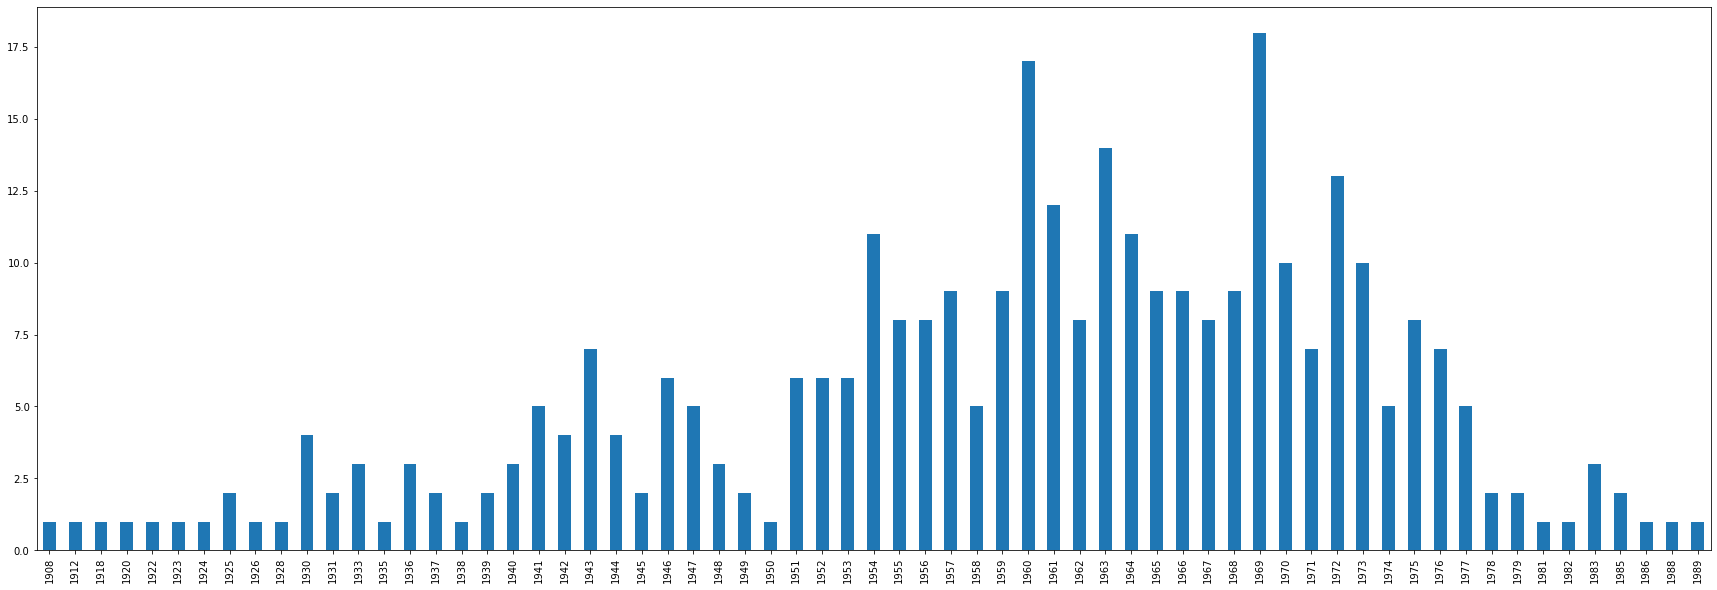

In [50]:
imdb_n_temp.birthYear.value_counts().sort_index().plot(kind = 'bar', figsize = (30,10))

### Add a "country" column to the merged table

In [286]:
imdb = pd.merge(imdbM, imdb_n, on = 'titleId').drop(columns = ['movie_director_y'])
imdb = imdb[['titleId','mv_fullname','movie_name_y','movie_year','num_of_nom','country',
      'movie_director_x','director','birthDate','deathDate','birthPlace','dlink',
      'imdb_rating','Metascore']]
imdb
# imdb.drop_duplicates(subset='movie_name', inplace=True)

titleId                                    mv_fullname  \
0    tt0166924                         Mulholland Dr. (2001)    
1    tt0118694                   In the Mood for Love (2000)    
2    tt0478304                       The Tree of Life (2011)    
3    tt2400275                       Adieu au langage (2014)    
4    tt1509132                    Keshtzar haye sepid (2009)    
5    tt1876360                   La Noche de Enfrente (2012)    
6    tt1020773                         Certified Copy (2010)    
7    tt0491044                               Man jeuk (2008)    
8    tt0338013  Eternal Sunshine of the Spotless Mind (2004)    
9    tt0477731                          Sang sattawat (2006)    
10   tt0245429                          Spirited Away (2001)    
11   tt2278388               The Grand Budapest Hotel (2014)    
12   tt0402399                          The New World (2005)    
13   tt0423176                                 Shijie (2004)    
14   tt0363589                               Elephant (2003)    
15   tt1790885                       Zero Dark Thirty (2012)    
16   tt0399146                  A History of Violence (2005)    
17   tt0381061                          Casino Royale (2006)    
18   tt2153963                                   Tabu (2012)    
19   tt1854513                           Blancanieves (2012)    
20   tt0978759                           Frozen River (2008)    
21   tt0280707                           Gosford Park (2001)    
22   tt1375666                              Inception (2010)    
23   tt0457430                        Pan's Labyrinth (2006)    
24   tt0387898                                  Caché (2005)    
25   tt0427312                            Grizzly Man (2005)    
26   tt2076220                            Holy Motors (2012)    
27   tt2340784                Le dernier des injustes (2013)    
28   tt0469494                    There Will Be Blood (2007)    
29   tt0254686                      The Piano Teacher (2001)    
..         ...                                            ...   
505  tt1340123                     Samson and Delilah (2009)    
506  tt0287963                        Choses secrètes (2002)    
507  tt0240419                             La Ciénaga (2001)    
508  tt1845804                          In the Family (2011)    
509  tt0302674                                  Gerry (2002)    
510  tt0120263            Songs from the Second Floor (2000)    
511  tt3521442                                 Xi you (2014)    
512  tt0424272                Melancholian 3 huonetta (2004)    
513  tt0322824                                  Japón (2002)    
514  tt2190367                     Neighboring Sounds (2012)    
515  tt0279065                               Time Out (2001)    
516  tt2280344                        Horící ker                
517  tt2178941                                Barbara (2012)    
518  tt0365376                  A Tale of Two Sisters (2003)    
519  tt1518812                          Meek's Cutoff (2010)    
520  tt0314331                          Love Actually (2003)    
521  tt0299658                                Chicago (2002)    
522  tt0146882                          High Fidelity (2000)    
523  tt1341167                             Four Lions (2010)    
524  tt1954470                     Gangs of Wasseypur (2012)    
525  tt0480025                        This Is England (2006)    
526  tt1189073                     La piel que habito (2011)    
527  tt0907657                                   Once (2007)    
528  tt0317171                            Sud sanaeha (2002)    
529  tt0799934                         Be Kind Rewind (2008)    
530  tt1073535                   Frontier of the Dawn (2008)    
531  tt0855824                           Hei yan quan (2006)    
532  tt0344273                          Kings & Queen (2004)    
533  tt0274558                              The Hours (2002)    
534  tt0769507           Tai yang zhao cha

In [287]:
imdb.to_csv('imdb.csv',index = False)

> ### I fixed several countries in the file by hand for easier mapping.
> - e.g.
>  * West Germany -> Germany
>  * USSR -> Russia


In [288]:
imdb = pd.read_csv('imdb_fixed.csv')

In [289]:
imdb['country'][imdb['country'] == 'Slovak Republic'] = 'Slovakia'

/Users/dongyinan1/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


> #### Query5: Top 10 countries with most films on the list

In [318]:
imdb.country.value_counts().head(10)

United States of America    150
United Kingdom               50
France                       43
Germany                      19
China                        19
Italy                        14
Japan                        12
Mexico                       11
Canada                       10
Iran                         10
Name: country, dtype: int64

In [320]:
imdb.country.value_counts().head(10).sort_values().plot(kind = 'barh')

In [331]:
# Source: World Bank - https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?
gdp = pd.read_csv('countries_gdp.csv')
gdp.gdp.astype(float)
gdp

country  year          gdp
0      United States  2018  20494099.85
1     United Kingdom  2018   2825207.95
2             France  2018   2777535.24
3              China  2018  13608151.86
4            Germany  2018   3996759.29
5              Italy  2018   2073901.99
6              Japan  2018   4970915.56
7             Mexico  2018   1223808.89
8  Iran Islamic Rep.  2017    454012.77
9             Canada  2018   1709327.32

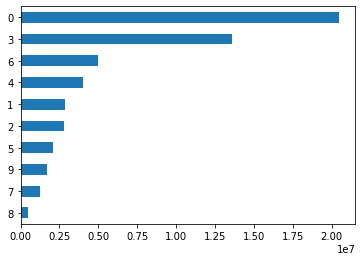

In [336]:
gdp['gdp'].sort_values().plot(kind = 'barh', x = 'gdp', y = 'country',)

### Prep DataFrames for mapping

In [291]:
imdb1 = imdb.groupby('country')['director'].value_counts().reset_index(name='count')
imdb1

country               director  count
0                   Argentina        Lucrecia Martel      3
1                   Argentina             Gaspar Noé      2
2                   Argentina         Damián Szifron      1
3                   Argentina       Fabián Bielinsky      1
4                   Argentina   Juan José Campanella      1
5                   Argentina         Mariano Llinás      1
6                   Australia           Baz Luhrmann      1
7                   Australia          George Miller      1
8                   Australia             Peter Weir      1
9                   Australia       Warwick Thornton      1
10                  Australia            Wayne Blair      1
11                    Austria        Jessica Hausner      1
12                    Austria    Nikolaus Geyrhalter      1
13                    Austria     Peter Tscherkassky      1
14                    Belgium        Chantal Akerman      3
15                    Belgium   Jean-Pierre Dardenne      2
16                    Belgium          Bouli Lanners      1
17                    Bolivia        Anthony Stabley      1
18                     Brazil     Fernando Meirelles      1
19                     Brazil  Kleber Mendonça Filho      1
20                   Cameroon        Jean-Marie Téno      1
21                     Canada       Denis Villeneuve      2
22                     Canada       David Cronenberg      1
23                     Canada             Guy Maddin      1
24                     Canada          James Cameron      1
25                     Canada           Jane Hancock      1
26                     Canada          Jason Reitman      1
27                     Canada       Jean-Marc Vallée      1
28                     Canada            Mary Harron      1
29                     Canada           Xavier Dolan      1
..                        ...                    ...    ...
301  United States of America            Pete Docter      1
302  United States of America         Philip Kaufman      1
303  United States of America      Philip S. Solomon      1
304  United States of America          Ramin Bahrani      1
305  United States of America           Rian Johnson      1
306  United States of America          Richard Kelly      1
307  United States of America           Rob Marshall      1
308  United States of America          Robert Altman      1
309  United States of America          Robert Greene      1
310  United States of America        Robert Zemeckis      1
311  United States of America           Ryan Coogler      1
312  United States of America        S. Craig Zahler      1
313  United States of America              Sam Raimi      1
314  United States of America             Sean Baker      1
315  United States of America            Shane Black      1
316  United States of America          Shane Carruth      1
317  United States of America  Shari Springer Berman      1
318  United States of America           Sidney Lumet      1
319  United States of America            Spike Jonze      1
320  United States of America          Terry Zwigoff      1
321  United States of America          Thom Andersen      1
322  United States of America            Todd Haynes      1
323  United States of America               Tom Ford      1
324  United States of America           Tom McCarthy      1
325  United States of America        Tommy Lee Jones      1
326  United States of America            Tony Gilroy      1
327  United States of America       Travis Wilkerson      1
328  United States of America            Trey Parker      1
329  United States of America          Whit Stillman      1
330                 Venezuela          Edgar Ramírez      1

[331 rows x 3 columns]

In [292]:
imdb1['string'] = imdb1['director'] + ": " + imdb1['count'].map(str) + \
    np.where(imdb1['count']>1, ' movies', ' movie')
imdb1.head()

country              director  count                         string
0  Argentina       Lucrecia Martel      3      Lucrecia Martel: 3 movies
1  Argentina            Gaspar Noé      2           Gaspar Noé: 2 movies
2  Argentina        Damián Szifron      1        Damián Szifron: 1 movie
3  Argentina      Fabián Bielinsky      1      Fabián Bielinsky: 1 movie
4  Argentina  Juan José Campanella      1  Juan José Campanella: 1 movie

In [302]:
output = imdb1.groupby('country')['string'].apply(lambda x: "<div id='director'><P>%s</P></div>" % '</p><p> '.join(x)).reset_index(name='properties.article')
output

country  \
0                  Argentina   
1                  Australia   
2                    Austria   
3                    Belgium   
4                    Bolivia   
5                     Brazil   
6                   Cameroon   
7                     Canada   
8                      Chile   
9                      China   
10                   Denmark   
11                   Ecuador   
12                   Finland   
13                    France   
14                   Germany   
15                    Greece   
16                     Haiti   
17                   Hungary   
18                     India   
19                      Iran   
20                   Ireland   
21                    Israel   
22                     Italy   
23                     Japan   
24                     Kenya   
25                   Lebanon   
26                 Lithuania   
27                  Malaysia   
28                Mauritania   
29                    Mexico   
30               New Zealand   
31                   Nigeria   
32               North Korea   
33          Papua New Guinea   
34               Philippines   
35                    Poland   
36                  Portugal   
37               Puerto Rico   
38        Republic of Serbia   
39                   Romania   
40                    Russia   
41                   Senegal   
42                 Singapore   
43                  Slovakia   
44              South Africa   
45               South Korea   
46                     Spain   
47                    Sweden   
48                     Syria   
49                    Taiwan   
50                  Thailand   
51                   Tunisia   
52                    Turkey   
53                   Ukraine   
54            United Kingdom   
55  United States of America   
56                 Venezuela   

                                   properties.article  
0   <div id='director'><P>Lucrecia Martel: 3 movie...  
1   <div id='director'><P>Baz Luhrmann: 1 movie</p...  
2   <div id='director'><P>Jessica Hausner: 1 movie...  
3   <div id='director'><P>Chantal Akerman: 3 movie...  
4   <div id='director'><P>Anthony Stabley: 1 movie...  
5   <div id='director'><P>Fernando Meirelles: 1 mo...  
6   <div id='director'><P>Jean-Marie Téno: 1 movie...  
7   <div id='director'><P>Denis Villeneuve: 2 movi...  
8   <div id='director'><P>Pablo Larraín: 2 movies<...  
9   <div id='director'><P>Hsiao-Hsien Hou: 4 movie...  
10  <div id='director'><P>Lars von Trier: 4 movies...  
11  <div id='director'><P>Mike Judge: 1 movie</P><...  
12  <div id='director'><P>Pirjo Honkasalo: 1 movie...  
13  <div id='director'><P>Jean-Luc Godard: 4 movie...  
14  <div id='director'><P>Michael Haneke: 4 movies...  
15  <div id='director'><P>Yorgos Lanthimos: 2 movi...  
16  <div id='director'><P>Raoul Peck: 1 movie</P><...  
17  <div id='director'><P>Béla Tarr: 2 movies</p><...  
18  <div id='director'><P>Anurag Kashyap: 2 movies...  
19  <div id='director'><P>Jafar Panahi: 4 movies</...  
20  <div id='director'><P>David O'Reilly: 1 movie<...  
21  <div id='director'><P>Ari Folman: 2 movies</p>...  
22  <div id='director'><P>Ermanno Olmi: 2 movies</...  
23  <div id='director'><P>Hayao Miyazaki: 2 movies...  
24  <div id='director'><P>Gurinder Chadha: 1 movie...  
25  <div id='director'><P>Nadine Labaki: 1 movie</...  
26  <div id='director'><P>Jonas Mekas: 1 movie</P>...  
27  <div id='director'><P>Ming-liang Tsai: 4 movie...  
28  <div id='director'><P>Abderrahmane Sissako: 2 ...  
29  <div id='director'><P>Alejandro G. Iñárritu: 4...  
30  <div id='director'><P>Peter Jackson: 2 movies<...  
31  <div id='director'><P>Newton I. Aduaka: 1 movi...  
32  <div id='director'><P>Sang-soo Hong: 1 movie</...  
33  <div id='director'><P>Henri Duparc: 1 movie</P...  
34  <div id='director'><P>Lav Diaz: 2 movies</P></...  
35  <div id='director'><P>Andrzej Wajda: 1 movie</...  
36  <div id='director'><P>Pedro Costa: 2 movies</p...  
37  <div id='director'><P>Miguel Art

In [304]:
# Count the number of movies in each country.
movies = imdb.groupby('country')['mv_fullname'].nunique().reset_index(name='properties.headline')
movies.head()

country  properties.headline
0  Argentina                    9
1  Australia                    5
2    Austria                    3
3    Belgium                    6
4    Bolivia                    1

In [305]:
output1 = output.merge(movies, on='country')
output1['properties.headline'] = output1['properties.headline'].astype(int)

In [306]:
output1['properties.headline'] = output1['properties.headline'].map(str) + \
    np.where(output1['properties.headline']>1, ' movies', ' movie')
output1

country  \
0                  Argentina   
1                  Australia   
2                    Austria   
3                    Belgium   
4                    Bolivia   
5                     Brazil   
6                   Cameroon   
7                     Canada   
8                      Chile   
9                      China   
10                   Denmark   
11                   Ecuador   
12                   Finland   
13                    France   
14                   Germany   
15                    Greece   
16                     Haiti   
17                   Hungary   
18                     India   
19                      Iran   
20                   Ireland   
21                    Israel   
22                     Italy   
23                     Japan   
24                     Kenya   
25                   Lebanon   
26                 Lithuania   
27                  Malaysia   
28                Mauritania   
29                    Mexico   
30               New Zealand   
31                   Nigeria   
32               North Korea   
33          Papua New Guinea   
34               Philippines   
35                    Poland   
36                  Portugal   
37               Puerto Rico   
38        Republic of Serbia   
39                   Romania   
40                    Russia   
41                   Senegal   
42                 Singapore   
43                  Slovakia   
44              South Africa   
45               South Korea   
46                     Spain   
47                    Sweden   
48                     Syria   
49                    Taiwan   
50                  Thailand   
51                   Tunisia   
52                    Turkey   
53                   Ukraine   
54            United Kingdom   
55  United States of America   
56                 Venezuela   

                                   properties.article properties.headline  
0   <div id='director'><P>Lucrecia Martel: 3 movie...            9 movies  
1   <div id='director'><P>Baz Luhrmann: 1 movie</p...            5 movies  
2   <div id='director'><P>Jessica Hausner: 1 movie...            3 movies  
3   <div id='director'><P>Chantal Akerman: 3 movie...            6 movies  
4   <div id='director'><P>Anthony Stabley: 1 movie...             1 movie  
5   <div id='director'><P>Fernando Meirelles: 1 mo...            2 movies  
6   <div id='director'><P>Jean-Marie Téno: 1 movie...             1 movie  
7   <div id='director'><P>Denis Villeneuve: 2 movi...           10 movies  
8   <div id='director'><P>Pablo Larraín: 2 movies<...            5 movies  
9   <div id='director'><P>Hsiao-Hsien Hou: 4 movie...           19 movies  
10  <div id='director'><P>Lars von Trier: 4 movies...            8 movies  
11  <div id='director'><P>Mike Judge: 1 movie</P><...             1 movie  
12  <div id='director'><P>Pirjo Honkasalo: 1 movie...             1 movie  
13  <div id='director'><P>Jean-Luc Godard: 4 movie...           43 movies  
14  <div id='director'><P>Michael Haneke: 4 movies...           19 movies  
15  <div id='director'><P>Yorgos Lanthimos: 2 movi...            2 movies  
16  <div id='director'><P>Raoul Peck: 1 movie</P><...             1 movie  
17  <div id='director'><P>Béla Tarr: 2 movies</p><...            3 movies  
18  <div id='director'><P>Anurag Kashyap: 2 movies...            5 movies  
19  <div id='director'><P>Jafar Panahi: 4 movies</...           10 movies  
20  <div id='director'><P>David O'Reilly: 1 movie<...            2 movies  
21  <div id='director'><P>Ari Folman: 2 movies</p>...            8 movies  
22  <div id='director'><P>Ermanno Olmi: 2 movies</...           14 movies  
23  <div id='director'><P>Hayao Miyazaki: 2 movies...           12 movies  
24  <div id='director'><P>Gurinder Chadha: 1 movie...             1 movie  
25  <div id='director'><P>Nadine Labaki: 1 movie</...             1 movie  
26  <div id='director'><P>Jonas Mekas: 1 movie</P>...             1 movie  
27  <div id='director'><P>Ming-liang

In [307]:
output1['properties.name'] = output1['country']
output1

country  \
0                  Argentina   
1                  Australia   
2                    Austria   
3                    Belgium   
4                    Bolivia   
5                     Brazil   
6                   Cameroon   
7                     Canada   
8                      Chile   
9                      China   
10                   Denmark   
11                   Ecuador   
12                   Finland   
13                    France   
14                   Germany   
15                    Greece   
16                     Haiti   
17                   Hungary   
18                     India   
19                      Iran   
20                   Ireland   
21                    Israel   
22                     Italy   
23                     Japan   
24                     Kenya   
25                   Lebanon   
26                 Lithuania   
27                  Malaysia   
28                Mauritania   
29                    Mexico   
30               New Zealand   
31                   Nigeria   
32               North Korea   
33          Papua New Guinea   
34               Philippines   
35                    Poland   
36                  Portugal   
37               Puerto Rico   
38        Republic of Serbia   
39                   Romania   
40                    Russia   
41                   Senegal   
42                 Singapore   
43                  Slovakia   
44              South Africa   
45               South Korea   
46                     Spain   
47                    Sweden   
48                     Syria   
49                    Taiwan   
50                  Thailand   
51                   Tunisia   
52                    Turkey   
53                   Ukraine   
54            United Kingdom   
55  United States of America   
56                 Venezuela   

                                   properties.article properties.headline  \
0   <div id='director'><P>Lucrecia Martel: 3 movie...            9 movies   
1   <div id='director'><P>Baz Luhrmann: 1 movie</p...            5 movies   
2   <div id='director'><P>Jessica Hausner: 1 movie...            3 movies   
3   <div id='director'><P>Chantal Akerman: 3 movie...            6 movies   
4   <div id='director'><P>Anthony Stabley: 1 movie...             1 movie   
5   <div id='director'><P>Fernando Meirelles: 1 mo...            2 movies   
6   <div id='director'><P>Jean-Marie Téno: 1 movie...             1 movie   
7   <div id='director'><P>Denis Villeneuve: 2 movi...           10 movies   
8   <div id='director'><P>Pablo Larraín: 2 movies<...            5 movies   
9   <div id='director'><P>Hsiao-Hsien Hou: 4 movie...           19 movies   
10  <div id='director'><P>Lars von Trier: 4 movies...            8 movies   
11  <div id='director'><P>Mike Judge: 1 movie</P><...             1 movie   
12  <div id='director'><P>Pirjo Honkasalo: 1 movie...             1 movie   
13  <div id='director'><P>Jean-Luc Godard: 4 movie...           43 movies   
14  <div id='director'><P>Michael Haneke: 4 movies...           19 movies   
15  <div id='director'><P>Yorgos Lanthimos: 2 movi...            2 movies   
16  <div id='director'><P>Raoul Peck: 1 movie</P><...             1 movie   
17  <div id='director'><P>Béla Tarr: 2 movies</p><...            3 movies   
18  <div id='director'><P>Anurag Kashyap: 2 movies...            5 movies   
19  <div id='director'><P>Jafar Panahi: 4 movies</...           10 movies   
20  <div id='director'><P>David O'Reilly: 1 movie<...            2 movies   
21  <div id='director'><P>Ari Folman: 2 movies</p>...            8 movies   
22  <div id='director'><P>Ermanno Olmi: 2 movies</...           14 movies   
23  <div id='director'><P>Hayao Miyazaki: 2 movies...           12 movies   
24  <div id='director'><P>Gurinder Chadha: 1 movie...             1 movie   
25  <div id='director'><P>Nadine Labaki: 1 movie</...             1 movie   
26  <div id='director'><P>Jonas Mekas: 1 movie</P>...             1 movie   
27  <div

In [308]:
output1 = output1.drop(columns = 'country')
output1 = output1[['properties.name','properties.article','properties.headline']]

In [309]:
output1

properties.name  \
0                  Argentina   
1                  Australia   
2                    Austria   
3                    Belgium   
4                    Bolivia   
5                     Brazil   
6                   Cameroon   
7                     Canada   
8                      Chile   
9                      China   
10                   Denmark   
11                   Ecuador   
12                   Finland   
13                    France   
14                   Germany   
15                    Greece   
16                     Haiti   
17                   Hungary   
18                     India   
19                      Iran   
20                   Ireland   
21                    Israel   
22                     Italy   
23                     Japan   
24                     Kenya   
25                   Lebanon   
26                 Lithuania   
27                  Malaysia   
28                Mauritania   
29                    Mexico   
30               New Zealand   
31                   Nigeria   
32               North Korea   
33          Papua New Guinea   
34               Philippines   
35                    Poland   
36                  Portugal   
37               Puerto Rico   
38        Republic of Serbia   
39                   Romania   
40                    Russia   
41                   Senegal   
42                 Singapore   
43                  Slovakia   
44              South Africa   
45               South Korea   
46                     Spain   
47                    Sweden   
48                     Syria   
49                    Taiwan   
50                  Thailand   
51                   Tunisia   
52                    Turkey   
53                   Ukraine   
54            United Kingdom   
55  United States of America   
56                 Venezuela   

                                   properties.article properties.headline  
0   <div id='director'><P>Lucrecia Martel: 3 movie...            9 movies  
1   <div id='director'><P>Baz Luhrmann: 1 movie</p...            5 movies  
2   <div id='director'><P>Jessica Hausner: 1 movie...            3 movies  
3   <div id='director'><P>Chantal Akerman: 3 movie...            6 movies  
4   <div id='director'><P>Anthony Stabley: 1 movie...             1 movie  
5   <div id='director'><P>Fernando Meirelles: 1 mo...            2 movies  
6   <div id='director'><P>Jean-Marie Téno: 1 movie...             1 movie  
7   <div id='director'><P>Denis Villeneuve: 2 movi...           10 movies  
8   <div id='director'><P>Pablo Larraín: 2 movies<...            5 movies  
9   <div id='director'><P>Hsiao-Hsien Hou: 4 movie...           19 movies  
10  <div id='director'><P>Lars von Trier: 4 movies...            8 movies  
11  <div id='director'><P>Mike Judge: 1 movie</P><...             1 movie  
12  <div id='director'><P>Pirjo Honkasalo: 1 movie...             1 movie  
13  <div id='director'><P>Jean-Luc Godard: 4 movie...           43 movies  
14  <div id='director'><P>Michael Haneke: 4 movies...           19 movies  
15  <div id='director'><P>Yorgos Lanthimos: 2 movi...            2 movies  
16  <div id='director'><P>Raoul Peck: 1 movie</P><...             1 movie  
17  <div id='director'><P>Béla Tarr: 2 movies</p><...            3 movies  
18  <div id='director'><P>Anurag Kashyap: 2 movies...            5 movies  
19  <div id='director'><P>Jafar Panahi: 4 movies</...           10 movies  
20  <div id='director'><P>David O'Reilly: 1 movie<...            2 movies  
21  <div id='director'><P>Ari Folman: 2 movies</p>...            8 movies  
22  <div id='director'><P>Ermanno Olmi: 2 movies</...           14 movies  
23  <div id='director'><P>Hayao Miyazaki: 2 movies...           12 movies  
24  <div id='director'><P>Gurinder Chadha: 1 movie...             1 movie  
25  <div id='director'><P>Nadine Labaki: 1 movie</...             1 movie  
26  <div id='director'><P>Jonas Mekas: 1 movie</P>...             1 movie  
27  <div id='director'><P>Mi

In [310]:
output1.to_csv('output1.csv')